NSE: 0.8366
KGE: 0.8102
RSR: 0.4043
PBIAS: -0.18%


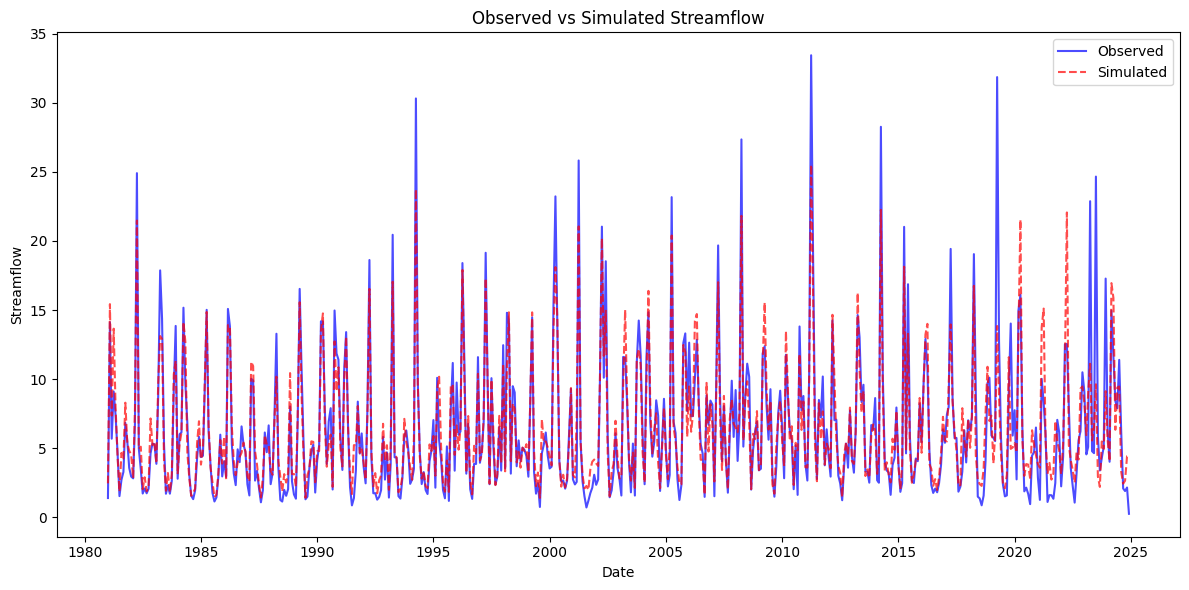

Results and metrics saved to simulation_results_and_metrics.xlsx


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib


data = pd.read_excel('Final Dataset.xlsx', sheet_name = 2)

data['Date'] = pd.to_datetime(data['Date'])  
target = 'Streamflow'  
features = ['Precipitation', 'Max Temperature', 'Min Temperature', 'Solar Radiation', 'Wind Speed', 'Relative Humidity']
X = data[features]
y_observed = data[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = joblib.load('RF_monthly.pkl')
y_simulated = model.predict(X_scaled)
def nse(observed, simulated):
    return 1 - np.sum((observed - simulated)**2) / np.sum((observed - np.mean(observed))**2)

def kge(observed, simulated):
    cc = np.corrcoef(observed, simulated)[0, 1]
    alpha = np.std(simulated) / np.std(observed)
    beta = np.mean(simulated) / np.mean(observed)
    return 1 - np.sqrt((cc - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)

def rsr(observed, simulated):
    return np.sqrt(mean_squared_error(observed, simulated)) / np.std(observed)

def pbias(observed, simulated):
    return 100 * np.sum(observed - simulated) / np.sum(observed)
nse_value = nse(y_observed, y_simulated)
kge_value = kge(y_observed, y_simulated)
rsr_value = rsr(y_observed, y_simulated)
pbias_value = pbias(y_observed, y_simulated)

# Print metrics
print(f"NSE: {nse_value:.4f}")
print(f"KGE: {kge_value:.4f}")
print(f"RSR: {rsr_value:.4f}")
print(f"PBIAS: {pbias_value:.2f}%")
output_file = "simulation_results_and_metrics.xlsx"
with pd.ExcelWriter(output_file) as writer:
    results = pd.DataFrame({
        "Date": data['Date'],
        "Observed": y_observed,
        "Simulated": y_simulated
    })
    results.to_excel(writer, sheet_name="Streamflow Data", index=False)
    
    # Save metrics
    metrics = {
        "Metric": ["NSE", "KGE", "RSR", "PBIAS"],
        "Value": [nse_value, kge_value, rsr_value, pbias_value]
    }
    metrics_df = pd.DataFrame(metrics)
    metrics_df.to_excel(writer, sheet_name="Error Metrics", index=False)
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], y_observed, label="Observed", color="blue", alpha=0.7)
plt.plot(data['Date'], y_simulated, label="Simulated", color="red", linestyle="--", alpha=0.7)
plt.title("Observed vs Simulated Streamflow")
plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()
plt.tight_layout()
plt.savefig("observed_vs_simulated_streamflow.png", dpi=300)
plt.show()

print(f"Results and metrics saved to {output_file}")


